In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

In [2]:
f = open('Allcoords_META_2014-11-25_2020-11-24.clean', 'r')

lines = f.readlines()

f.close()

In [3]:
# Looking at the first line of the text file
print(lines[0])

RA_[deg], Dec_[deg], Duration_[s], YYYY-MM-DD, MJDstart, MJDend, filename, target, orig_src_name, project_code, priband, Baseline_MAX_[m], Baseline_MIN_[m], AZstart, ELstart, AZend, ELend_[deg], RA_tracking_rate_[rad/day], Dec_tracking_rate_[rad/day], Delay_center_epoch_[MJD], AZ_point_offset, EL_point_offset_[arcmin]



In [4]:
# Looking at the second line of the text file
print(lines[1])

346.236180  12.322810  474.0  2014-11-25  56986.030550  56986.036036  VLITE-2014-11-25T004355-0.META  NGC7479  NGC7479   14B-396  1.5GHz  3.387490e+03  1.699677e+02  137.008  62.222  140.514  63.304   0.000   0.000  None   0.000   0.000 



In [5]:
# Counting the number of receivers

receivers = set()

for line in lines[1:]:

    info = line.split('  ')
    rcvr = info[10]
    
    receivers.add(rcvr)

print('Number of receivers:', len(receivers))
print(receivers)

Number of receivers: 9
{'6GHz', '10GHz', '15GHz', '45GHz', '3GHz', '22GHz', '1.5GHz', '33GHz', '300MHz'}


In [73]:
# Rewriting the list manually

receivers = ['300MHz', '1.5GHz', '3GHz', '6GHz', '10GHz', '15GHz', '22GHz', '33GHz', '45GHz']
print(receivers)

['300MHz', '1.5GHz', '3GHz', '6GHz', '10GHz', '15GHz', '22GHz', '33GHz', '45GHz']


In [8]:
d = {}
for y in range(2014, 2021):
    d[y] = []

check = {}
for y in range(2014, 2021):
    check[y] = set()

In [9]:
# Examine one line at a time
for line in lines[1:]:
    
    info = line.split('  ')

    # Info needed in each line: which receiver, target name, date
    year = int(info[3].split('-')[0])
    start = float(info[4])
    target = info[7]
    duration = float(info[2])
    rcvr = info[10]
    
    duplicate = False
    if (rcvr + target) in check[year]:
        duplicate = True
    
    d[year].append([start, duration, rcvr, target, duplicate])
    check[year].add(rcvr + target)

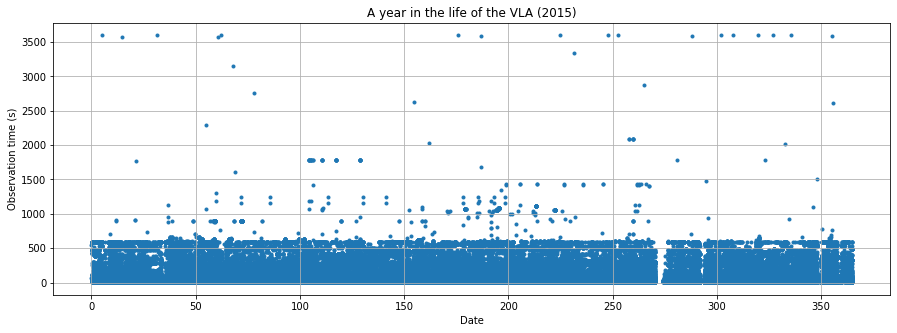

In [10]:
dates = []
times = []

for obs in d[2015]:
    dates.append(obs[0])
    times.append(obs[1])

dates = np.array(dates)
dates = dates - min(dates)
    
plt.scatter(dates, times, marker='.')

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2015)')

plt.gcf().set_size_inches(15, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
plt.show()

In [11]:
dates_2015 = []
times_2015 = []

for obs in d[2015]:
    dates_2015.append(obs[0])
    times_2015.append(obs[1])

dates_2015 = np.array(dates_2015)
dates_2015 = dates_2015 - min(dates_2015)

n_2015 = int(max(dates_2015)) + 1

time_per_day_2015 = []

for i in range(n_2015):
    
    t = 0
    for j in range(len(dates_2015)):
        if int(dates_2015[j]) == i:
            t += times_2015[j]
    time_per_day_2015.append(t)
#    print(i)

In [12]:
time_per_day_2015 = np.array(time_per_day_2015) / 3600

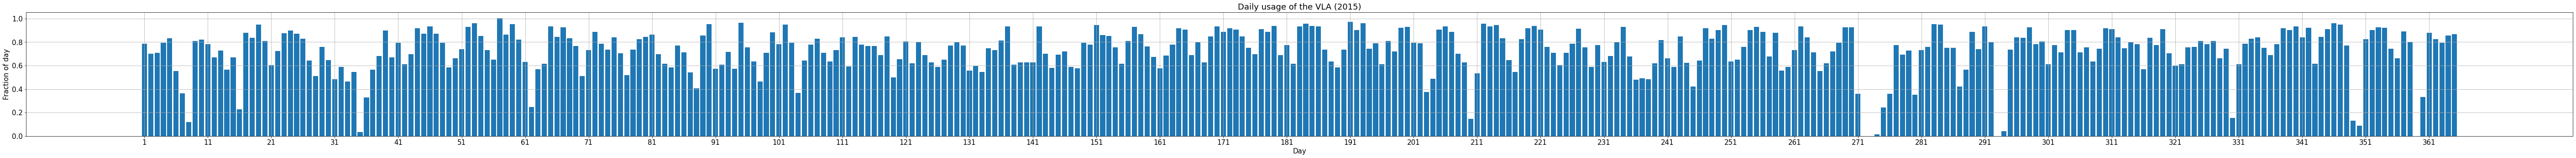

In [13]:
days_2015 = np.arange(n_2015) + 1

plt.bar(days_2015, time_per_day_2015 / 24)

plt.xlabel('Day')
plt.ylabel('Fraction of day')
plt.title('Daily usage of the VLA (2015)')

ticks = np.arange(0, n_2015, 10) + 1
plt.xticks(ticks=ticks)

plt.gcf().set_size_inches(100, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
plt.show()

In [14]:
targets_2015 = set()

for obs in d[2015]:

    target = obs[3]
    targets_2015.add(target)

Fraction of year spent observing: 0.724363235667174
Number of individual tagets: 18439
Average time per individual target: 0.34413048128664486 hours


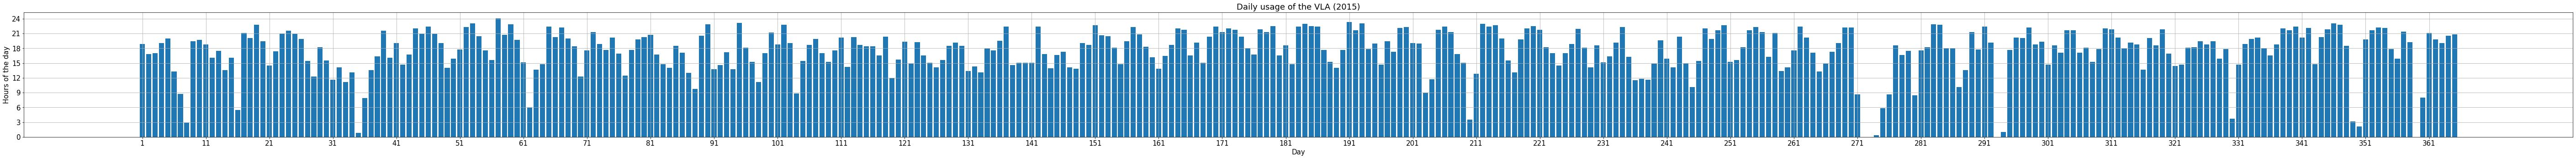

In [15]:
days_2015 = np.arange(n_2015) + 1

plt.bar(days_2015, time_per_day_2015)

plt.xlabel('Day')
plt.ylabel('Hours of the day')
plt.title('Daily usage of the VLA (2015)')

ticks = np.arange(0, n_2015, 10) + 1
plt.xticks(ticks=ticks)

yticks = np.arange(0, 25, 3)
plt.yticks(ticks=yticks)

plt.gcf().set_size_inches(100, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
print('Fraction of year spent observing:', np.sum(time_per_day_2015) / (24 * n_2015))
print('Number of individual tagets:', len(targets_2015))
print('Average time per individual target:', np.sum(time_per_day_2015) / len(targets_2015), 'hours')
plt.show()

In [16]:
dates_2016 = []
times_2016 = []

for obs in d[2016]:
    dates_2016.append(obs[0])
    times_2016.append(obs[1])

dates_2016 = np.array(dates_2016)
dates_2016 = dates_2016 - min(dates_2016)

n_2016 = int(max(dates_2016)) + 1

time_per_day_2016 = []

for i in range(n_2016):
    
    t = 0
    for j in range(len(dates_2016)):
        if int(dates_2016[j]) == i:
            t += times_2016[j]
    time_per_day_2016.append(t)
#    print(i)

In [17]:
time_per_day_2016 = np.array(time_per_day_2016) / 3600

In [18]:
targets_2016 = set()

for obs in d[2016]:

    target = obs[3]
    targets_2016.add(target)

Fraction of year spent observing: 0.6974722348714835
Number of individual tagets: 36376
Average time per individual target: 0.16842412885174596 hours


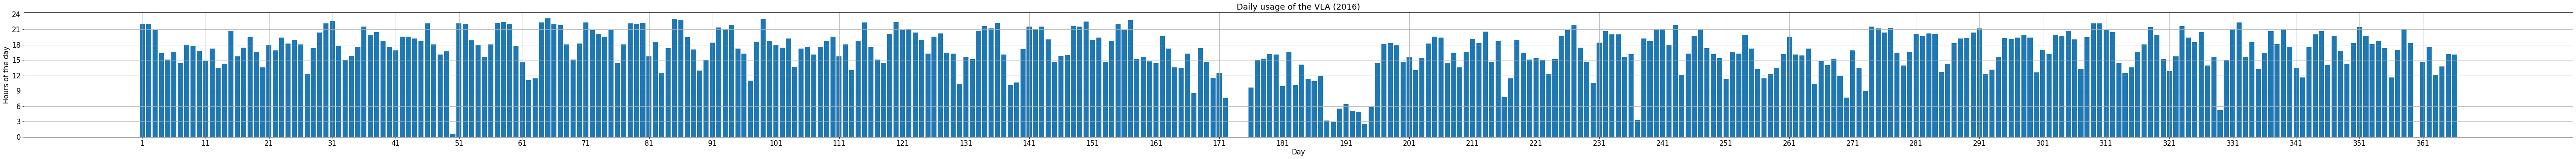

In [19]:
days_2016 = np.arange(n_2016) + 1

plt.bar(days_2016, time_per_day_2016)

plt.xlabel('Day')
plt.ylabel('Hours of the day')
plt.title('Daily usage of the VLA (2016)')

ticks = np.arange(0, n_2016, 10) + 1
plt.xticks(ticks=ticks)

yticks = np.arange(0, 25, 3)
plt.yticks(ticks=yticks)

plt.gcf().set_size_inches(100, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
print('Fraction of year spent observing:', np.sum(time_per_day_2016) / (24 * n_2016))
print('Number of individual tagets:', len(targets_2016))
print('Average time per individual target:', np.sum(time_per_day_2016) / len(targets_2016), 'hours')
plt.show()

In [20]:
dates_2017 = []
times_2017 = []

for obs in d[2017]:
    dates_2017.append(obs[0])
    times_2017.append(obs[1])

dates_2017 = np.array(dates_2017)
dates_2017 = dates_2017 - min(dates_2017)

n_2017 = int(max(dates_2017)) + 1

time_per_day_2017 = []

for i in range(n_2017):
    
    t = 0
    for j in range(len(dates_2017)):
        if int(dates_2017[j]) == i:
            t += times_2017[j]
    time_per_day_2017.append(t)
#    print(i)

In [21]:
time_per_day_2017 = np.array(time_per_day_2017) / 3600

In [22]:
targets_2017 = set()

for obs in d[2017]:

    target = obs[3]
    targets_2017.add(target)

Fraction of year spent observing: 0.7266979008117708
Number of individual tagets: 91276
Average time per individual target: 0.06974312646381428 hours


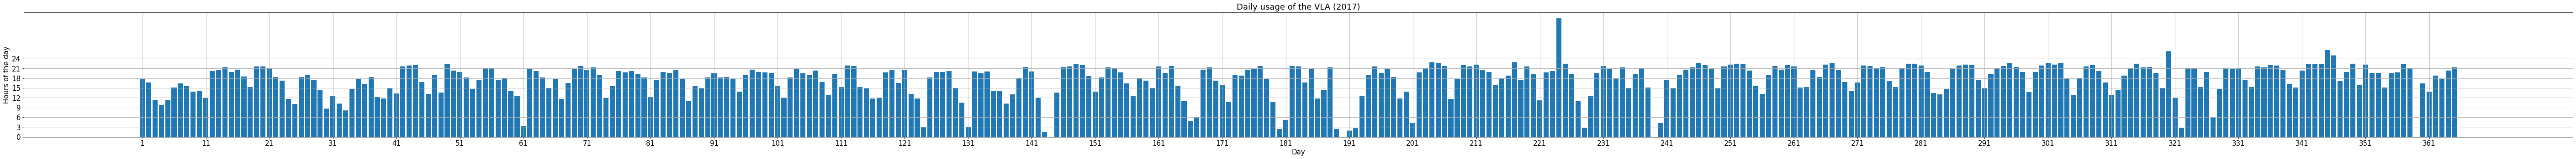

In [23]:
days_2017 = np.arange(n_2017) + 1

plt.bar(days_2017, time_per_day_2017)

plt.xlabel('Day')
plt.ylabel('Hours of the day')
plt.title('Daily usage of the VLA (2017)')

ticks = np.arange(0, n_2017, 10) + 1
plt.xticks(ticks=ticks)

yticks = np.arange(0, 25, 3)
plt.yticks(ticks=yticks)

plt.gcf().set_size_inches(100, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
print('Fraction of year spent observing:', np.sum(time_per_day_2017) / (24 * n_2017))
print('Number of individual tagets:', len(targets_2017))
print('Average time per individual target:', np.sum(time_per_day_2017) / len(targets_2017), 'hours')
plt.show()

In [24]:
dates_2018 = []
times_2018 = []

for obs in d[2018]:
    dates_2018.append(obs[0])
    times_2018.append(obs[1])

dates_2018 = np.array(dates_2018)
dates_2018 = dates_2018 - min(dates_2018)

n_2018 = int(max(dates_2018)) + 1

time_per_day_2018 = []

for i in range(n_2018):
    
    t = 0
    for j in range(len(dates_2018)):
        if int(dates_2018[j]) == i:
            t += times_2018[j]
    time_per_day_2018.append(t)
#    print(i)

In [25]:
time_per_day_2018 = np.array(time_per_day_2018) / 3600

In [26]:
targets_2018 = set()

for obs in d[2018]:

    target = obs[3]
    targets_2018.add(target)

Fraction of year spent observing: 0.596734462201928
Number of individual tagets: 34226
Average time per individual target: 0.1527316627385289 hours


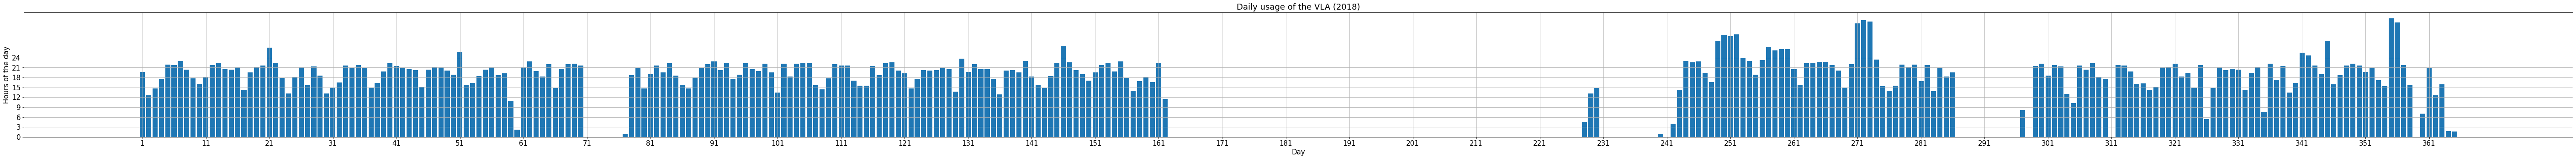

In [27]:
days_2018 = np.arange(n_2018) + 1

plt.bar(days_2018, time_per_day_2018)

plt.xlabel('Day')
plt.ylabel('Hours of the day')
plt.title('Daily usage of the VLA (2018)')

ticks = np.arange(0, n_2018, 10) + 1
plt.xticks(ticks=ticks)

yticks = np.arange(0, 25, 3)
plt.yticks(ticks=yticks)

plt.gcf().set_size_inches(100, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
print('Fraction of year spent observing:', np.sum(time_per_day_2018) / (24 * n_2018))
print('Number of individual tagets:', len(targets_2018))
print('Average time per individual target:', np.sum(time_per_day_2018) / len(targets_2018), 'hours')
plt.show()

In [28]:
dates_2019 = []
times_2019 = []

for obs in d[2019]:
    dates_2019.append(obs[0])
    times_2019.append(obs[1])

dates_2019 = np.array(dates_2019)
dates_2019 = dates_2019 - min(dates_2019)

n_2019 = int(max(dates_2019)) + 1

time_per_day_2019 = []

for i in range(n_2019):
    
    t = 0
    for j in range(len(dates_2019)):
        if int(dates_2019[j]) == i:
            t += times_2019[j]
    time_per_day_2019.append(t)
#    print(i)

In [29]:
time_per_day_2019 = np.array(time_per_day_2019) / 3600

In [30]:
targets_2019 = set()

for obs in d[2019]:

    target = obs[3]
    targets_2019.add(target)

In [31]:
all_targets = set()

for y in np.arange(2015, 2020):
    for obs in d[y]:
        target = obs[3]
        all_targets.add(target)

print(len(all_targets))

261468


Fraction of year spent observing: 0.7801316590563167
Number of individual tagets: 101002
Average time per individual target: 0.0676615644574695 hours


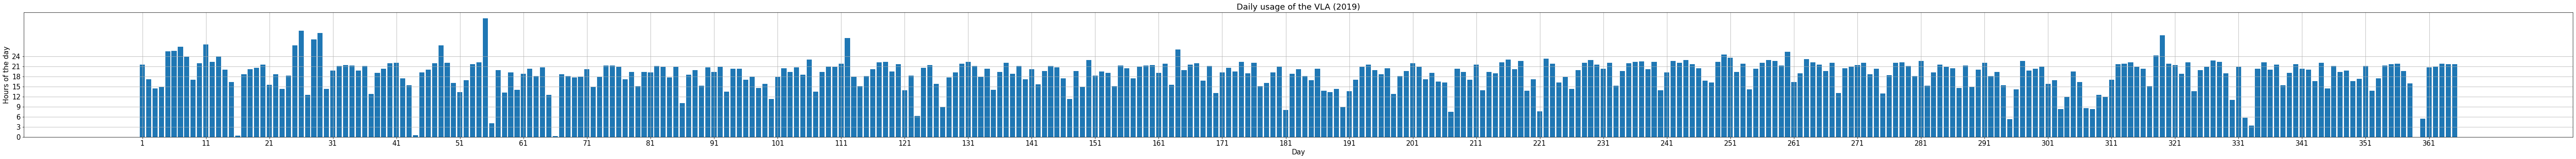

In [32]:
days_2019 = np.arange(n_2019) + 1

plt.bar(days_2019, time_per_day_2019)

plt.xlabel('Day')
plt.ylabel('Hours of the day')
plt.title('Daily usage of the VLA (2019)')

ticks = np.arange(0, n_2019, 10) + 1
plt.xticks(ticks=ticks)

yticks = np.arange(0, 25, 3)
plt.yticks(ticks=yticks)

plt.gcf().set_size_inches(100, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
print('Fraction of year spent observing:', np.sum(time_per_day_2019) / (24 * n_2019))
print('Number of individual tagets:', len(targets_2019))
print('Average time per individual target:', np.sum(time_per_day_2019) / len(targets_2019), 'hours')
plt.show()

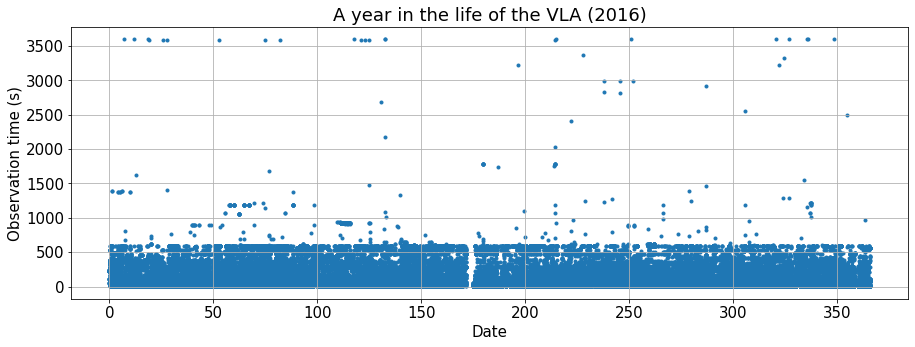

In [33]:
dates = []
times = []

for obs in d[2016]:
    dates.append(obs[0])
    times.append(obs[1])

dates = np.array(dates)
dates = dates - min(dates)
    
plt.scatter(dates, times, marker='.')

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2016)')

plt.gcf().set_size_inches(15, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
plt.show()

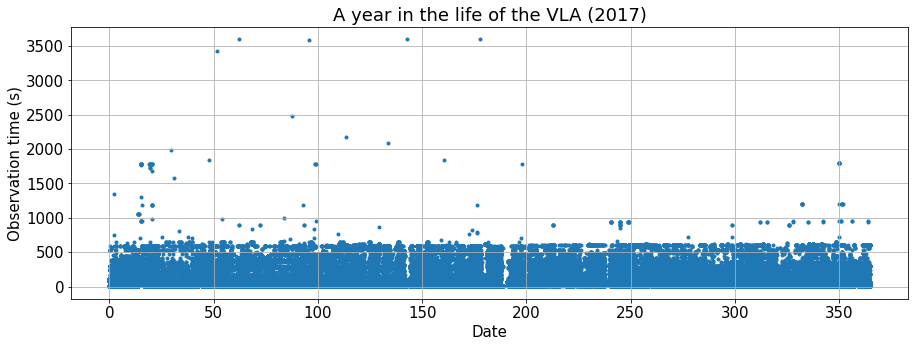

In [34]:
dates = []
times = []

for obs in d[2017]:
    dates.append(obs[0])
    times.append(obs[1])

dates = np.array(dates)
dates = dates - min(dates)
    
plt.scatter(dates, times, marker='.')

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2017)')

plt.gcf().set_size_inches(15, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
plt.show()

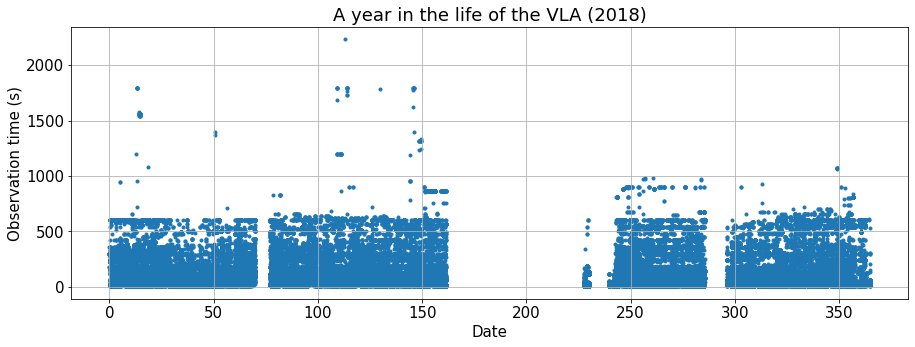

In [35]:
dates = []
times = []

for obs in d[2018]:
    dates.append(obs[0])
    times.append(obs[1])

dates = np.array(dates)
dates = dates - min(dates)
    
plt.scatter(dates, times, marker='.')

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2018)')

plt.gcf().set_size_inches(15, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
plt.show()

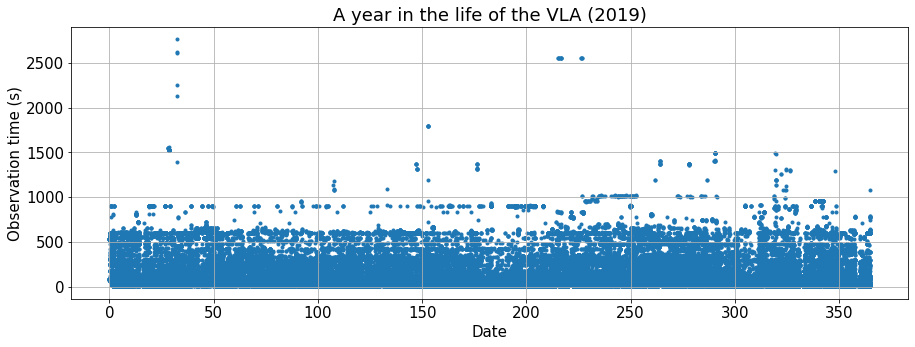

In [36]:
dates = []
times = []

for obs in d[2019]:
    dates.append(obs[0])
    times.append(obs[1])

dates = np.array(dates)
dates = dates - min(dates)
    
plt.scatter(dates, times, marker='.')

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2019)')

plt.gcf().set_size_inches(15, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
plt.show()

In [37]:
max(dates)

364.9933680000031

In [74]:
color_list = ['red', 'blue', 'green', 'black', 'fuchsia', 'gold', 'orange', 'brown', 'cyan']

color_dict = {}
for i, rcvr in enumerate(receivers):
    color_dict[rcvr] = color_list[i]

rcvr_plot = {}
for rcvr in receivers:
    rcvr_plot[rcvr] = [[[], [], 'x', color_dict[rcvr]], [[], [], '.', color_dict[rcvr]]]

for obs in d[2015]:
    if obs[4]:
        rcvr_plot[obs[2]][1][0].append(obs[0])
        rcvr_plot[obs[2]][1][1].append(obs[1])
    else:
        rcvr_plot[obs[2]][0][0].append(obs[0])
        rcvr_plot[obs[2]][0][1].append(obs[1])

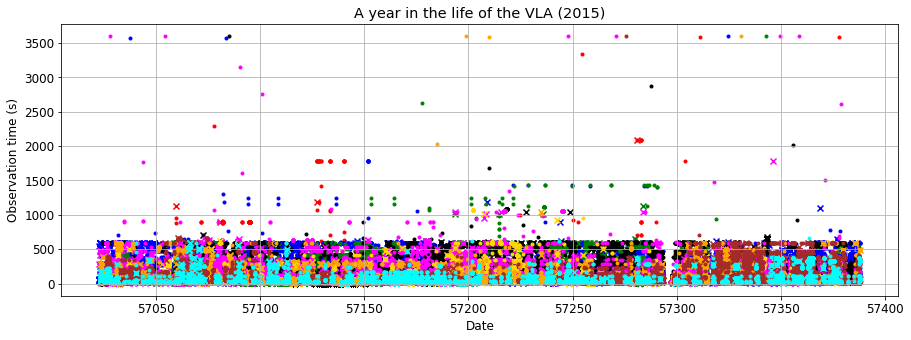

In [75]:
for rcvr in receivers:
    p = rcvr_plot[rcvr][0]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3], label=rcvr[:-3] + '-' + rcvr[-3:] + ' receiver')
    p = rcvr_plot[rcvr][1]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3])

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2015)')

plt.gcf().set_size_inches(15, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
plt.show()

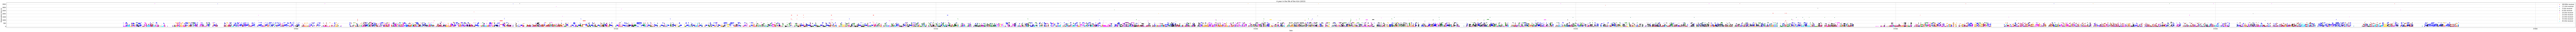

In [76]:
for rcvr in receivers:
    p = rcvr_plot[rcvr][0]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3], label=rcvr[:-3] + '-' + rcvr[-3:] + ' receiver')
    p = rcvr_plot[rcvr][1]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3])

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2015)')

plt.gcf().set_size_inches(500, 5)
plt.rc('font', size=15)
plt.grid()
plt.legend()
plt.show()

In [77]:
color_list = ['red', 'blue', 'green', 'black', 'fuchsia', 'gold', 'orange', 'brown', 'cyan']

color_dict = {}
for i, rcvr in enumerate(receivers):
    color_dict[rcvr] = color_list[i]

rcvr_plot = {}
for rcvr in receivers:
    rcvr_plot[rcvr] = [[[], [], 'x', color_dict[rcvr]], [[], [], '.', color_dict[rcvr]]]

for obs in d[2016]:
    if obs[4]:
        rcvr_plot[obs[2]][1][0].append(obs[0])
        rcvr_plot[obs[2]][1][1].append(obs[1])
    else:
        rcvr_plot[obs[2]][0][0].append(obs[0])
        rcvr_plot[obs[2]][0][1].append(obs[1])

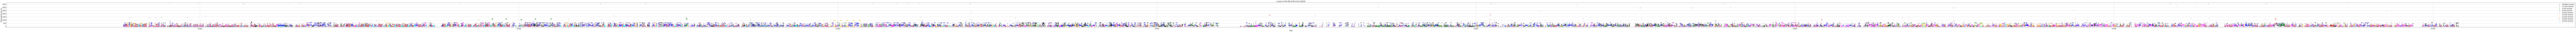

In [78]:
for rcvr in receivers:
    p = rcvr_plot[rcvr][0]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3], label=rcvr[:-3] + '-' + rcvr[-3:] + ' receiver')
    p = rcvr_plot[rcvr][1]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3])

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2016)')

plt.gcf().set_size_inches(500, 5)
plt.rc('font', size=15)
plt.grid()
plt.legend()
plt.show()

In [79]:
color_list = ['red', 'blue', 'green', 'black', 'fuchsia', 'gold', 'orange', 'brown', 'cyan']

color_dict = {}
for i, rcvr in enumerate(receivers):
    color_dict[rcvr] = color_list[i]

rcvr_plot = {}
for rcvr in receivers:
    rcvr_plot[rcvr] = [[[], [], 'x', color_dict[rcvr]], [[], [], '.', color_dict[rcvr]]]

for obs in d[2017]:
    if obs[4]:
        rcvr_plot[obs[2]][1][0].append(obs[0])
        rcvr_plot[obs[2]][1][1].append(obs[1])
    else:
        rcvr_plot[obs[2]][0][0].append(obs[0])
        rcvr_plot[obs[2]][0][1].append(obs[1])

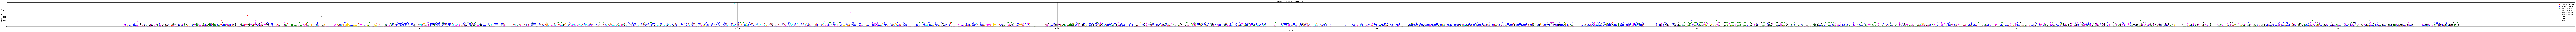

In [80]:
for rcvr in receivers:
    p = rcvr_plot[rcvr][0]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3], label=rcvr[:-3] + '-' + rcvr[-3:] + ' receiver')
    p = rcvr_plot[rcvr][1]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3])

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2017)')

plt.gcf().set_size_inches(500, 5)
plt.rc('font', size=15)
plt.grid()
plt.legend()
plt.show()

In [81]:
color_list = ['red', 'blue', 'green', 'black', 'fuchsia', 'gold', 'orange', 'brown', 'cyan']

color_dict = {}
for i, rcvr in enumerate(receivers):
    color_dict[rcvr] = color_list[i]

rcvr_plot = {}
for rcvr in receivers:
    rcvr_plot[rcvr] = [[[], [], 'x', color_dict[rcvr]], [[], [], '.', color_dict[rcvr]]]

for obs in d[2018]:
    if obs[4]:
        rcvr_plot[obs[2]][1][0].append(obs[0])
        rcvr_plot[obs[2]][1][1].append(obs[1])
    else:
        rcvr_plot[obs[2]][0][0].append(obs[0])
        rcvr_plot[obs[2]][0][1].append(obs[1])

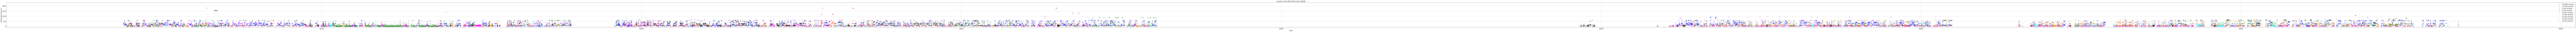

In [82]:
for rcvr in receivers:
    p = rcvr_plot[rcvr][0]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3], label=rcvr[:-3] + '-' + rcvr[-3:] + ' receiver')
    p = rcvr_plot[rcvr][1]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3])

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2018)')

plt.gcf().set_size_inches(500, 5)
plt.rc('font', size=15)
plt.grid()
plt.legend()
plt.show()

In [83]:
color_list = ['red', 'blue', 'green', 'black', 'fuchsia', 'gold', 'orange', 'brown', 'cyan']

color_dict = {}
for i, rcvr in enumerate(receivers):
    color_dict[rcvr] = color_list[i]

rcvr_plot = {}
for rcvr in receivers:
    rcvr_plot[rcvr] = [[[], [], 'x', color_dict[rcvr]], [[], [], '.', color_dict[rcvr]]]

for obs in d[2019]:
    if obs[4]:
        rcvr_plot[obs[2]][1][0].append(obs[0])
        rcvr_plot[obs[2]][1][1].append(obs[1])
    else:
        rcvr_plot[obs[2]][0][0].append(obs[0])
        rcvr_plot[obs[2]][0][1].append(obs[1])

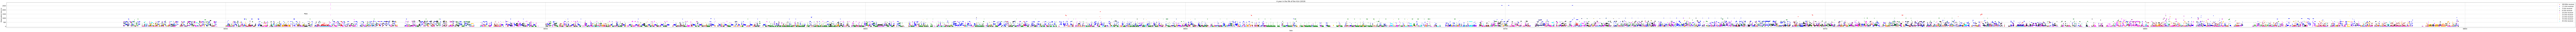

In [84]:
for rcvr in receivers:
    p = rcvr_plot[rcvr][0]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3], label=rcvr[:-3] + '-' + rcvr[-3:] + ' receiver')
    p = rcvr_plot[rcvr][1]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3])

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2019)')

plt.gcf().set_size_inches(500, 5)
plt.rc('font', size=15)
plt.grid()
plt.legend()
plt.show()

In [85]:
usage = {}
for rcvr in receivers:
    usage[rcvr] = 0

for obs in d[2015]:
    usage[obs[2]] += obs[1]

usage_list = []
for rcvr in receivers:
    usage_list.append(usage[rcvr])

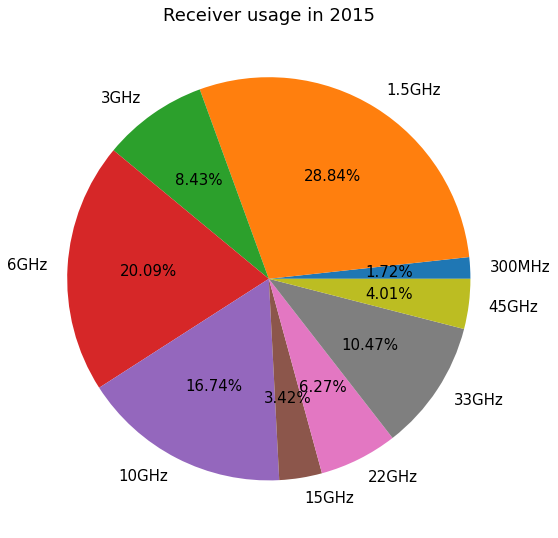

In [86]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')


ax.pie(usage_list, labels=receivers, autopct='%1.2f%%')

plt.title('Receiver usage in 2015')
plt.gcf().set_size_inches(7, 7)
plt.rc('font', size=12)
plt.show()

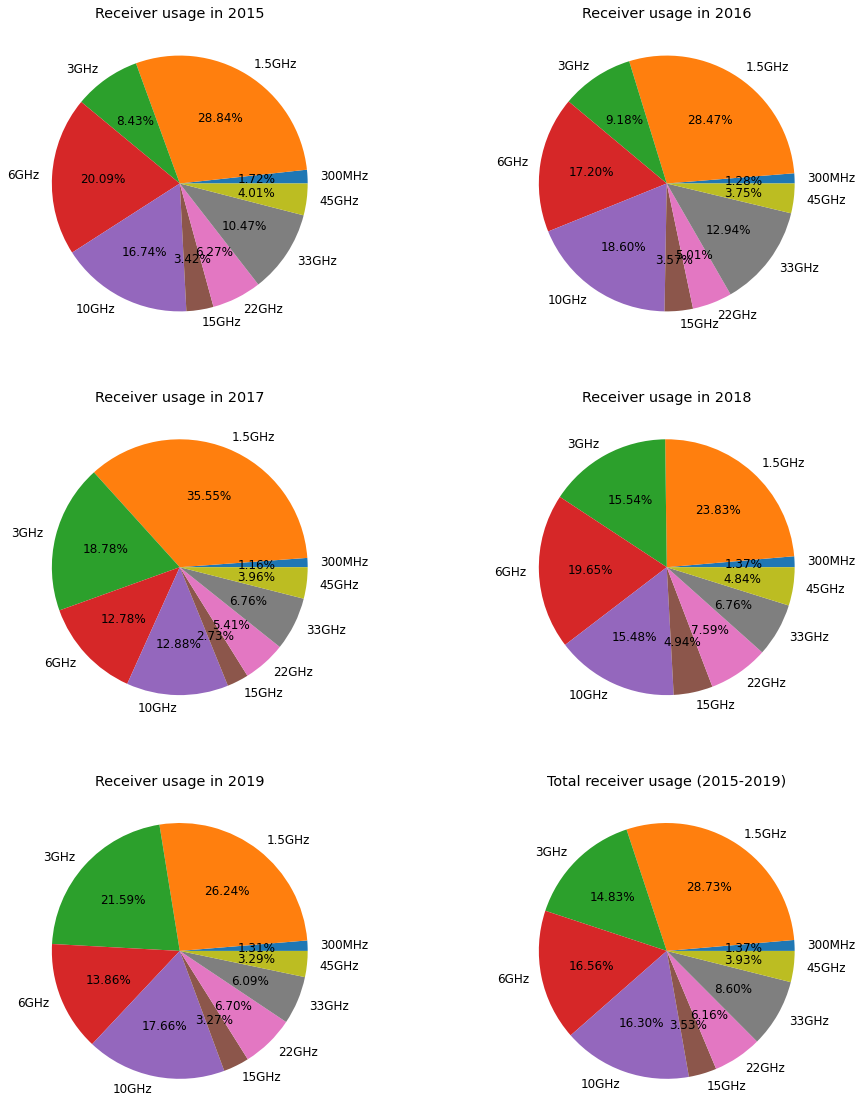

In [88]:
plt.subplot(3, 2, 1)

usage = {}
for rcvr in receivers:
    usage[rcvr] = 0

for obs in d[2015]:
    usage[obs[2]] += obs[1]

usage_list = []
for rcvr in receivers:
    usage_list.append(usage[rcvr])

plt.pie(usage_list, labels=receivers, autopct='%1.2f%%')
plt.title('Receiver usage in 2015')


plt.subplot(3, 2, 2)

usage = {}
for rcvr in receivers:
    usage[rcvr] = 0

for obs in d[2016]:
    usage[obs[2]] += obs[1]

usage_list = []
for rcvr in receivers:
    usage_list.append(usage[rcvr])

plt.pie(usage_list, labels=receivers, autopct='%1.2f%%')
plt.title('Receiver usage in 2016')


plt.subplot(3, 2, 3)

usage = {}
for rcvr in receivers:
    usage[rcvr] = 0

for obs in d[2017]:
    usage[obs[2]] += obs[1]

usage_list = []
for rcvr in receivers:
    usage_list.append(usage[rcvr])

plt.pie(usage_list, labels=receivers, autopct='%1.2f%%')
plt.title('Receiver usage in 2017')


plt.subplot(3, 2, 4)

usage = {}
for rcvr in receivers:
    usage[rcvr] = 0

for obs in d[2018]:
    usage[obs[2]] += obs[1]

usage_list = []
for rcvr in receivers:
    usage_list.append(usage[rcvr])

plt.pie(usage_list, labels=receivers, autopct='%1.2f%%')
plt.title('Receiver usage in 2018')


plt.subplot(3, 2, 5)

usage = {}
for rcvr in receivers:
    usage[rcvr] = 0

for obs in d[2019]:
    usage[obs[2]] += obs[1]

usage_list = []
for rcvr in receivers:
    usage_list.append(usage[rcvr])

plt.pie(usage_list, labels=receivers, autopct='%1.2f%%')
plt.title('Receiver usage in 2019')


plt.subplot(3, 2, 6)

usage = {}
for rcvr in receivers:
    usage[rcvr] = 0

for y in np.arange(2015, 2020):
    for obs in d[y]:
        usage[obs[2]] += obs[1]

usage_list = []
for rcvr in receivers:
    usage_list.append(usage[rcvr])

plt.pie(usage_list, labels=receivers, autopct='%1.2f%%')
plt.title('Total receiver usage (2015-2019)')


plt.gcf().set_size_inches(16, 20)
plt.rc('font', size=12)
plt.show()

In [89]:
y = 2015
rcvr = '1.5GHz'

time_per_target = {}

for obs in d[y]:
    if obs[2] == rcvr:
        if obs[3] not in time_per_target:
            time_per_target[obs[3]] = obs[1]/3600
        else:
            time_per_target[obs[3]] += obs[1]/3600

In [90]:
for target in time_per_target:
    if time_per_target[target] > 140:
        print(target)

deepfield


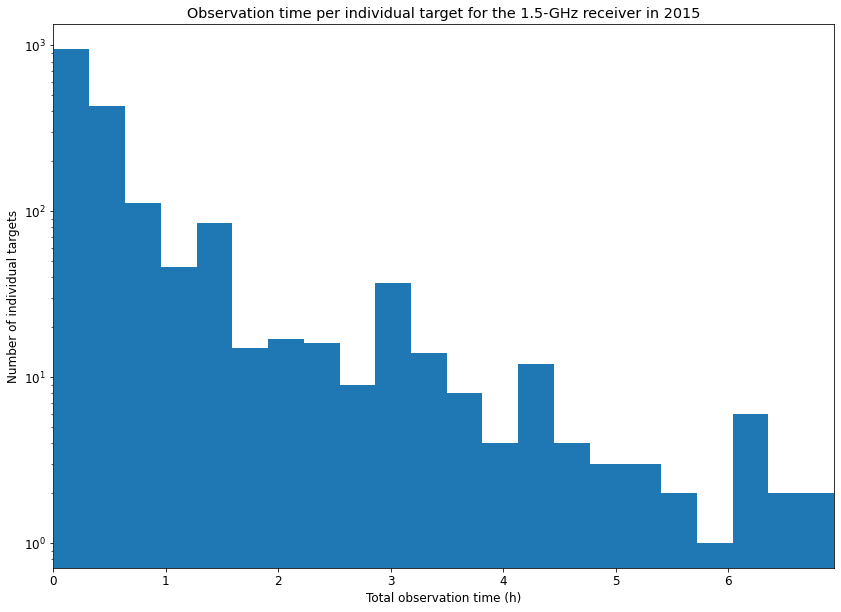

In [91]:
plt.hist(time_per_target.values(), log=True, bins=500)

plt.xlabel('Total observation time (h)')
plt.ylabel('Number of individual targets')
plt.title('Observation time per individual target for the ' + rcvr[:-3] + '-' + rcvr[-3:] + ' receiver in ' 
          + str(y))

plt.xlim(0, 25000/3600)

plt.gcf().set_size_inches(14, 10)
plt.rc('font', size=14)
plt.show()

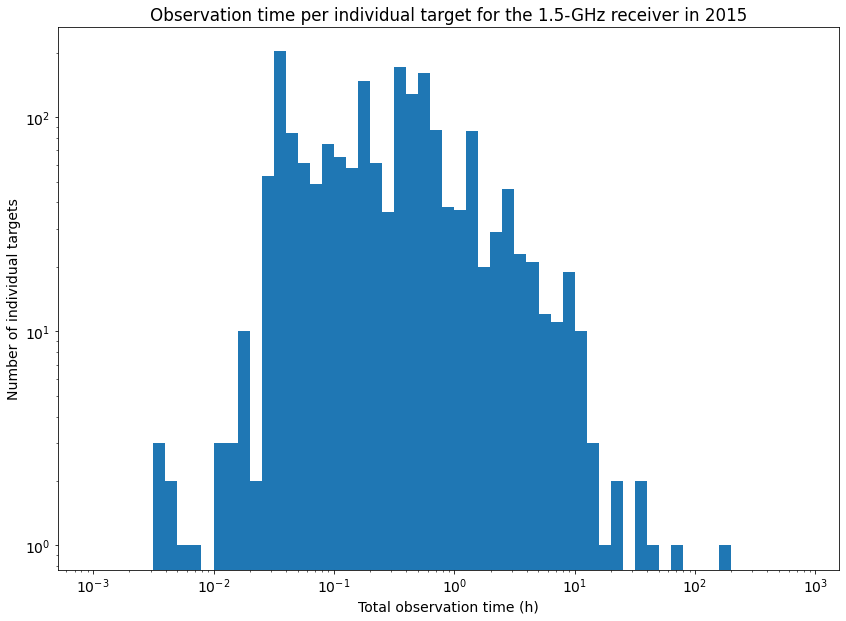

In [92]:
bins = 10 ** (np.arange(-3, 3, 0.1))

plt.hist(time_per_target.values(), log=True, bins=bins)

plt.xlabel('Total observation time (h)')
plt.ylabel('Number of individual targets')
plt.title('Observation time per individual target for the ' + rcvr[:-3] + '-' + rcvr[-3:] + ' receiver in ' 
          + str(y))

plt.xscale('log')
#plt.xlim(0, 25000/3600)

plt.gcf().set_size_inches(14, 10)
plt.rc('font', size=14)
plt.show()

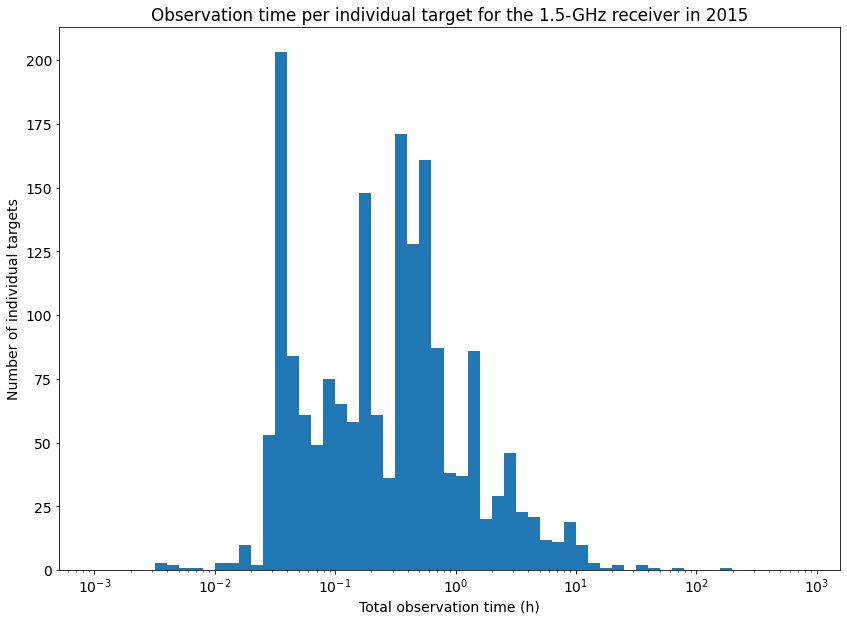

In [93]:
bins = 10 ** (np.arange(-3, 3, 0.1))

plt.hist(time_per_target.values(), log=False, bins=bins)

plt.xlabel('Total observation time (h)')
plt.ylabel('Number of individual targets')
plt.title('Observation time per individual target for the ' + rcvr[:-3] + '-' + rcvr[-3:] + ' receiver in ' 
          + str(y))

plt.xscale('log')
#plt.xlim(0, 25000/3600)

plt.gcf().set_size_inches(14, 10)
plt.rc('font', size=14)
plt.show()

In [94]:
n = np.log(np.arange(1, 100))

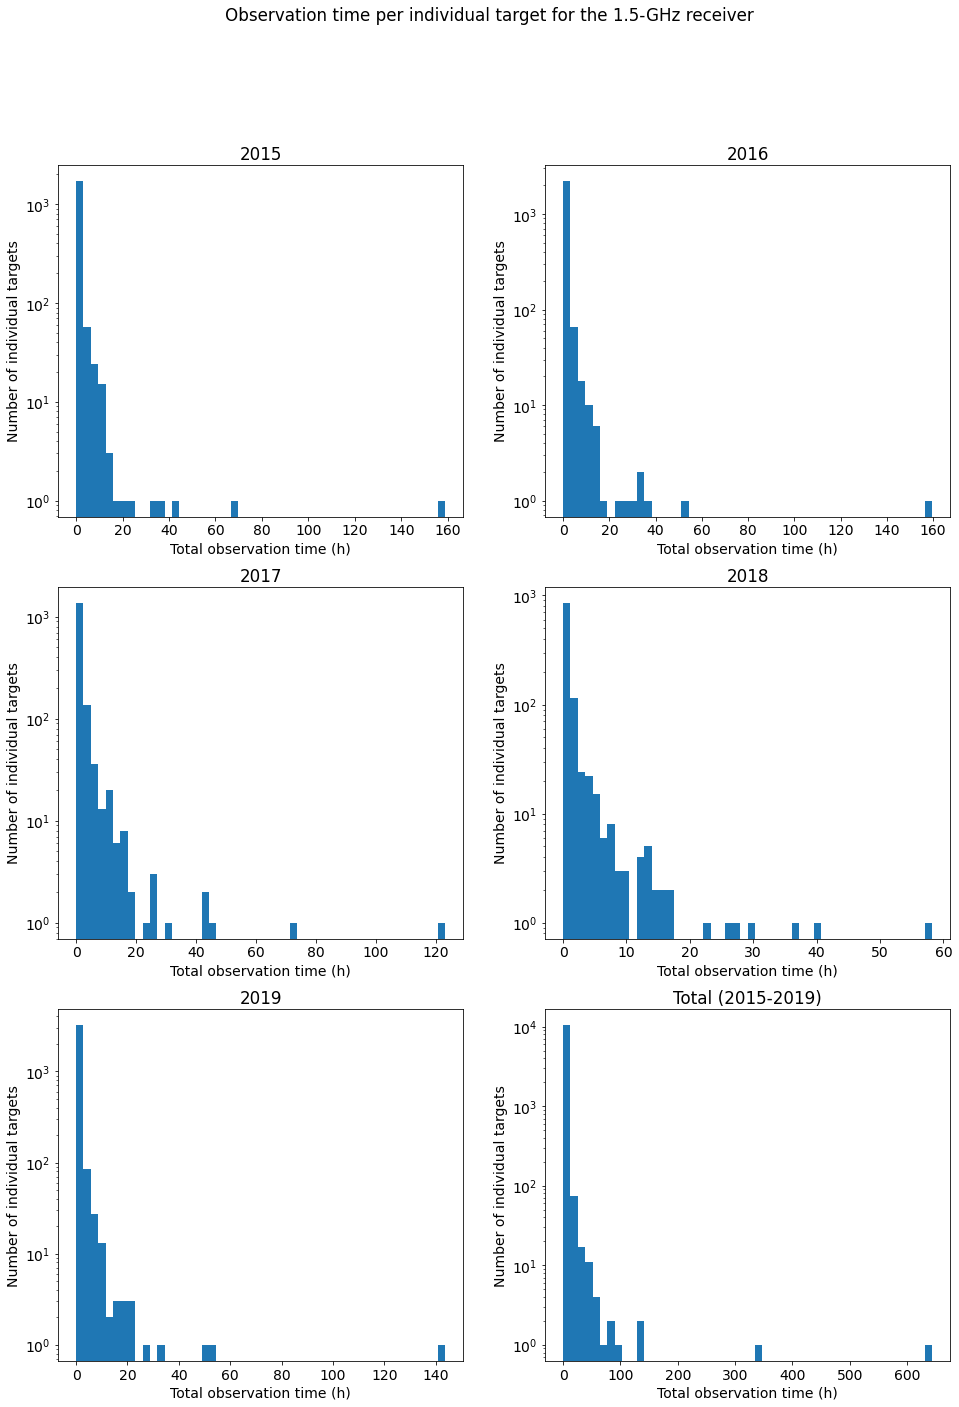

In [95]:
rcvr = '1.5GHz'

for i, y in enumerate(np.arange(2015, 2020)):

    plt.subplot(3, 2, i + 1)

    time_per_target = {}

    for obs in d[y]:
        if obs[2] == rcvr:
            if obs[3] not in time_per_target:
                time_per_target[obs[3]] = obs[1]/3600
            else:
                time_per_target[obs[3]] += obs[1]/3600

    plt.hist(time_per_target.values(), log=True, bins=50)

    plt.xlabel('Total observation time (h)')
    plt.ylabel('Number of individual targets')
    plt.title(str(y))


plt.subplot(3, 2, 6)

time_per_target = {}
for y in d:
    for obs in d[y]:
        if obs[2] == rcvr:
            if obs[3] not in time_per_target:
                time_per_target[obs[3]] = obs[1]/3600
            else:
                time_per_target[obs[3]] += obs[1]/3600

plt.hist(time_per_target.values(), log=True, bins=50)

plt.xlabel('Total observation time (h)')
plt.ylabel('Number of individual targets')
plt.title('Total (2015-2019)')

plt.suptitle('Observation time per individual target for the ' + rcvr[:-3] + '-' + rcvr[-3:] + ' receiver')
plt.gcf().set_size_inches(16, 22)
plt.rc('font', size=14)
plt.show()

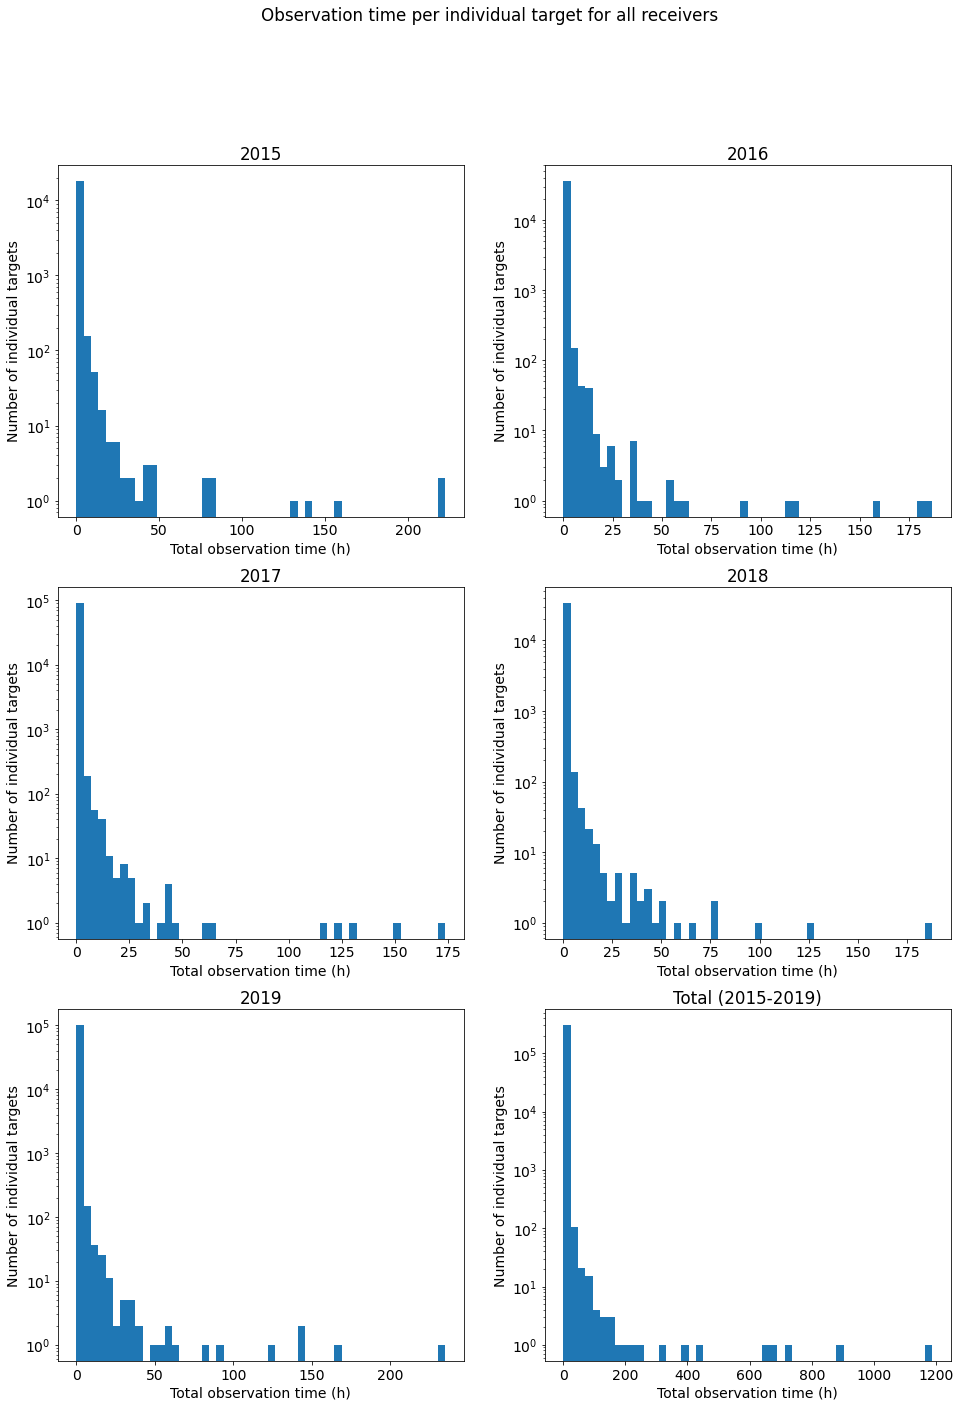

In [96]:
for i, y in enumerate(np.arange(2015, 2020)):

    plt.subplot(3, 2, i + 1)

    time_per_target = {}

    for obs in d[y]:
        if obs[3] not in time_per_target:
            time_per_target[obs[3]] = obs[1]/3600
        else:
            time_per_target[obs[3]] += obs[1]/3600

    plt.hist(time_per_target.values(), log=True, bins=50)

    plt.xlabel('Total observation time (h)')
    plt.ylabel('Number of individual targets')
    plt.title(str(y))


plt.subplot(3, 2, 6)

time_per_target = {}
for y in d:
    for obs in d[y]:
        if obs[3] not in time_per_target:
            time_per_target[obs[3]] = obs[1]/3600
        else:
            time_per_target[obs[3]] += obs[1]/3600

plt.hist(time_per_target.values(), log=True, bins=50)

plt.xlabel('Total observation time (h)')
plt.ylabel('Number of individual targets')
plt.title('Total (2015-2019)')

plt.suptitle('Observation time per individual target for all receivers')
plt.gcf().set_size_inches(16, 22)
plt.rc('font', size=12)
plt.show()

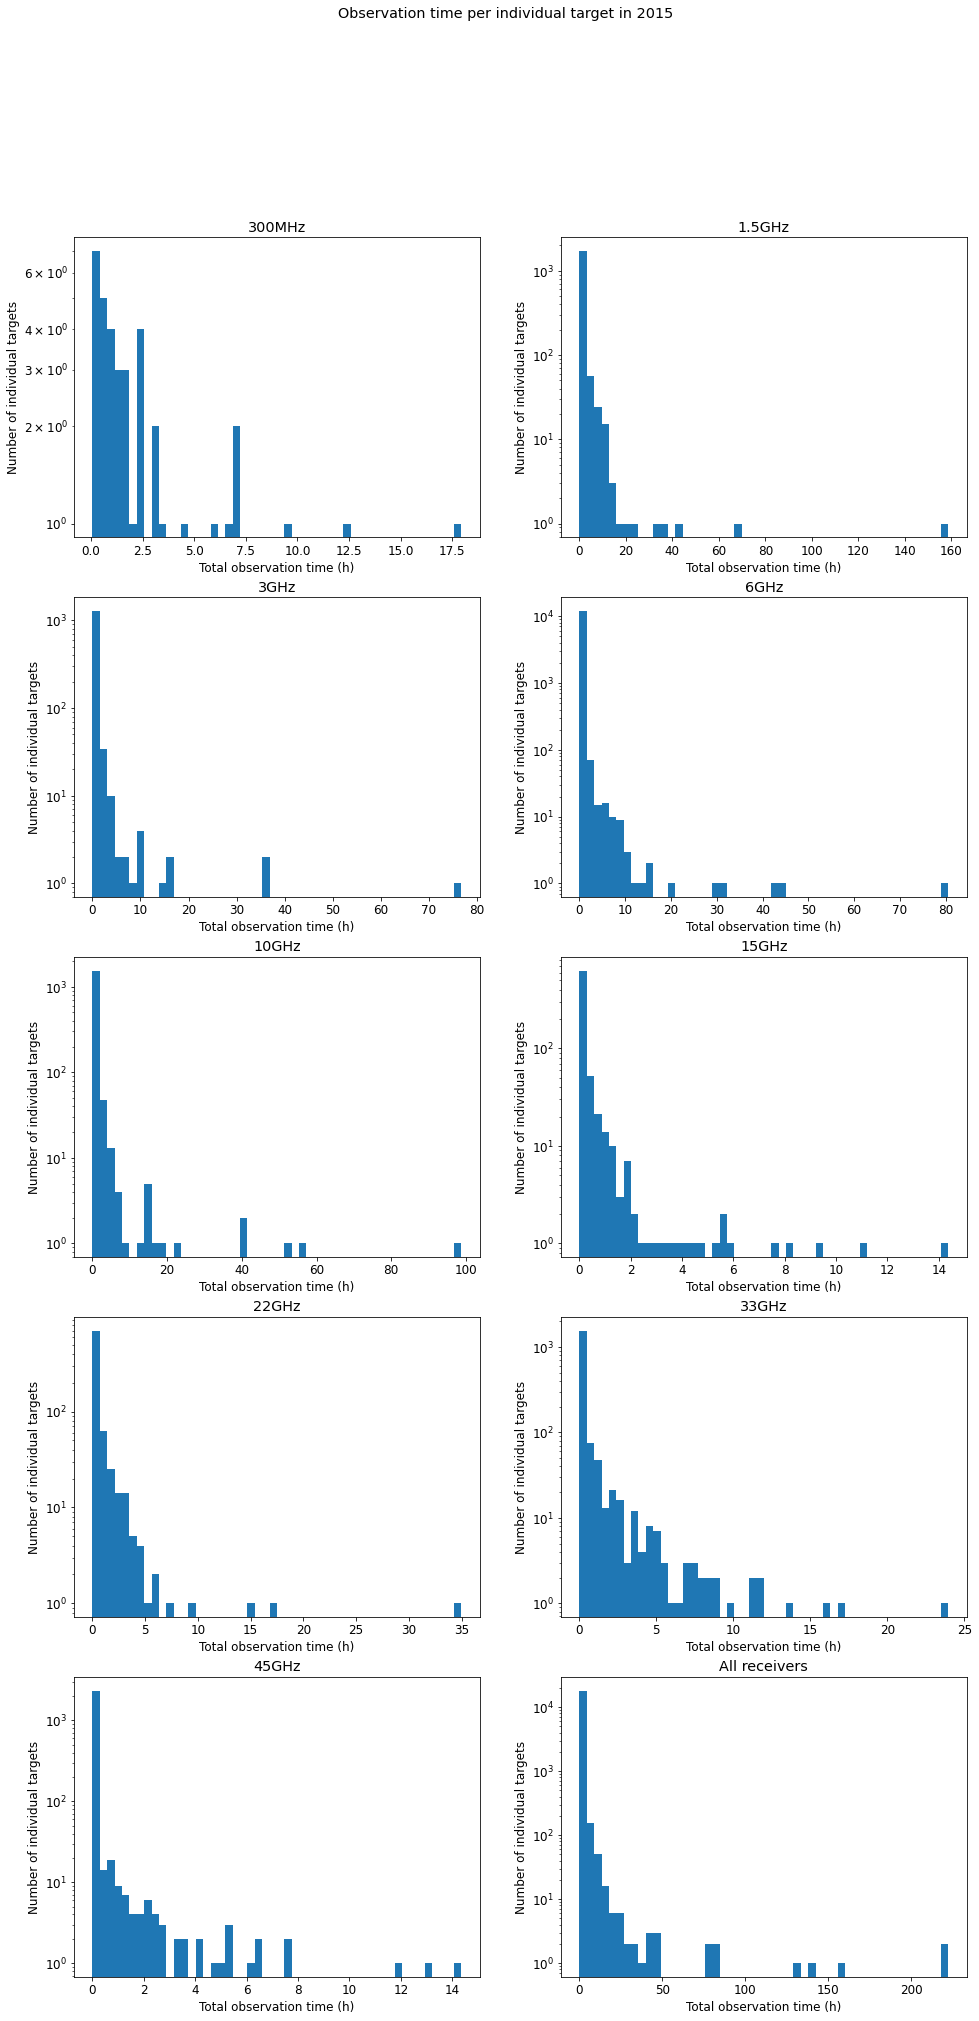

In [97]:
y = 2015

for i, rcvr in enumerate(receivers):

    plt.subplot(5, 2, i + 1)

    time_per_target = {}

    for obs in d[y]:
        if obs[2] == rcvr:
            if obs[3] not in time_per_target:
                time_per_target[obs[3]] = obs[1]/3600
            else:
                time_per_target[obs[3]] += obs[1]/3600

    plt.hist(time_per_target.values(), log=True, bins=50)

    plt.xlabel('Total observation time (h)')
    plt.ylabel('Number of individual targets')
    plt.title(rcvr)


plt.subplot(5, 2, 10)

time_per_target = {}

for obs in d[y]:
    if obs[3] not in time_per_target:
        time_per_target[obs[3]] = obs[1]/3600
    else:
        time_per_target[obs[3]] += obs[1]/3600

plt.hist(time_per_target.values(), log=True, bins=50)

plt.xlabel('Total observation time (h)')
plt.ylabel('Number of individual targets')
plt.title('All receivers')

plt.suptitle('Observation time per individual target in ' + str(y))
plt.gcf().set_size_inches(16, 32)
plt.rc('font', size=11)
plt.show()

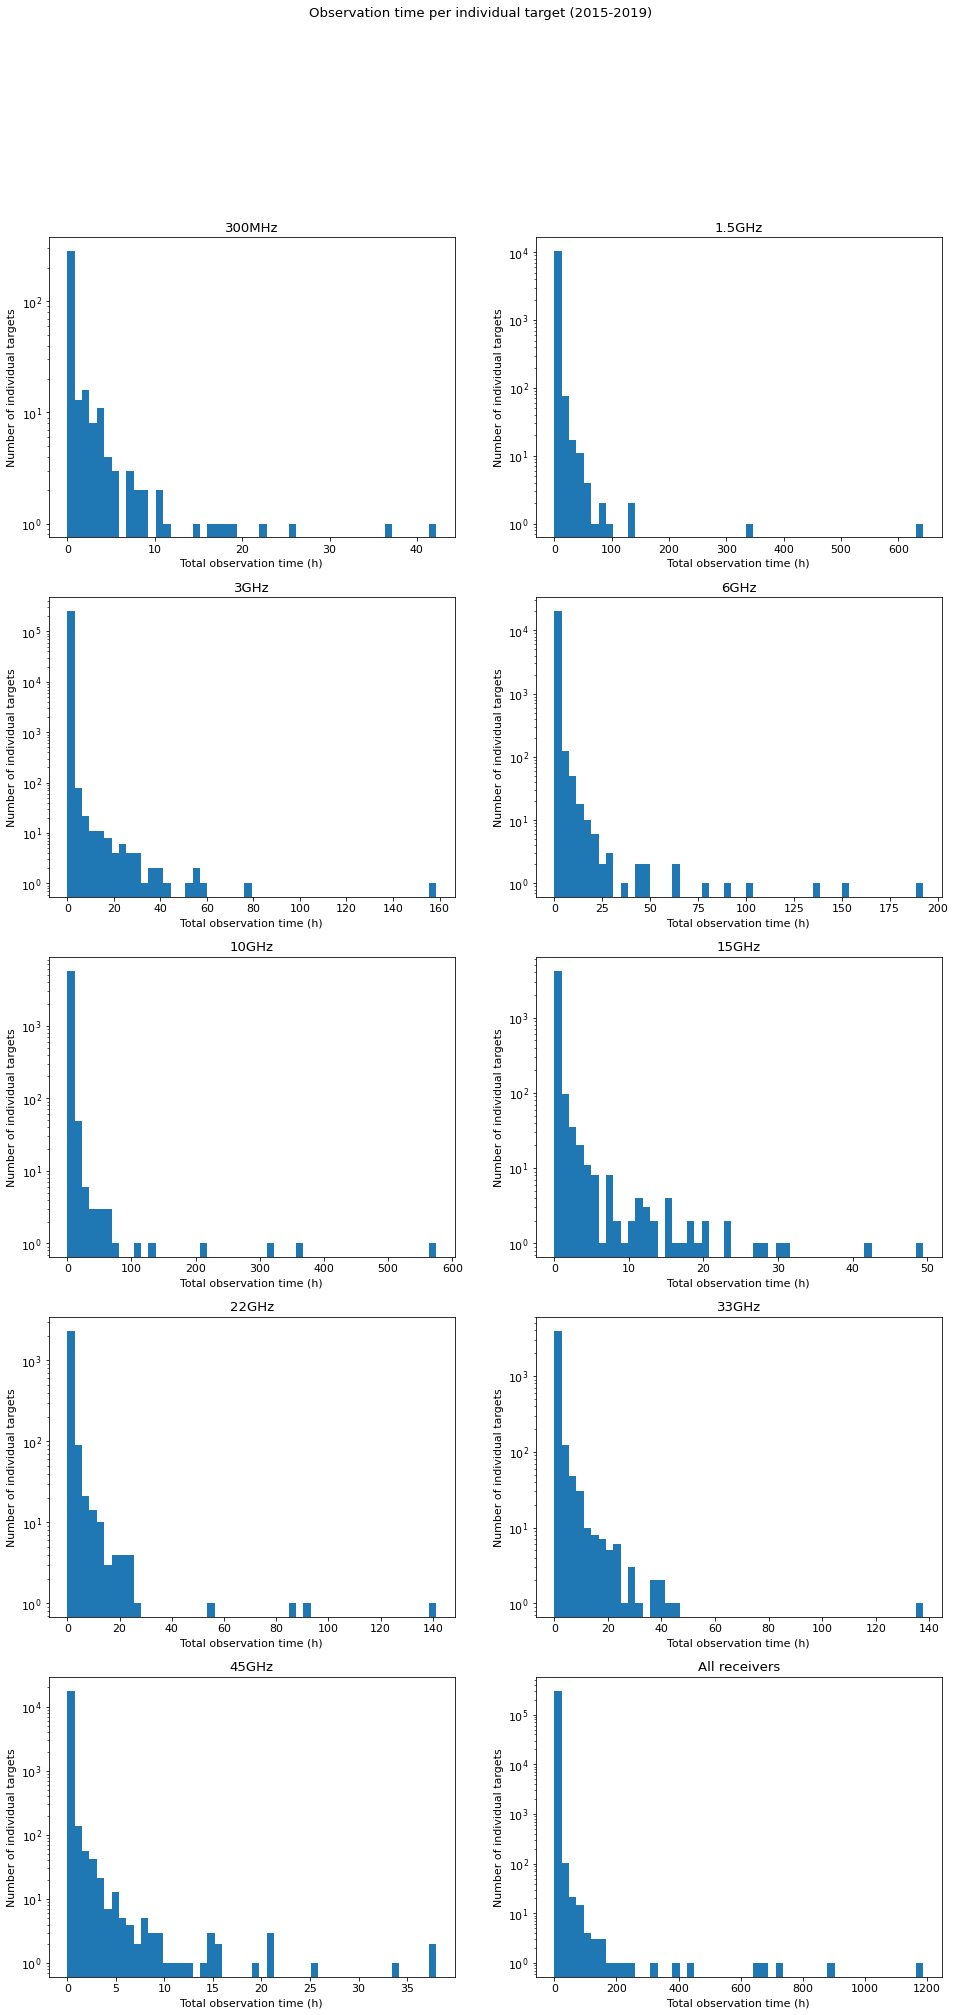

In [98]:
for i, rcvr in enumerate(receivers):

    plt.subplot(5, 2, i + 1)

    time_per_target = {}

    for y in d:
        for obs in d[y]:
            if obs[2] == rcvr:
                if obs[3] not in time_per_target:
                    time_per_target[obs[3]] = obs[1]/3600
                else:
                    time_per_target[obs[3]] += obs[1]/3600

    plt.hist(time_per_target.values(), log=True, bins=50)

    plt.xlabel('Total observation time (h)')
    plt.ylabel('Number of individual targets')
    plt.title(rcvr)


plt.subplot(5, 2, 10)

time_per_target = {}

for y in d:
    for obs in d[y]:
        if obs[3] not in time_per_target:
            time_per_target[obs[3]] = obs[1]/3600
        else:
            time_per_target[obs[3]] += obs[1]/3600

plt.hist(time_per_target.values(), log=True, bins=50)

plt.xlabel('Total observation time (h)')
plt.ylabel('Number of individual targets')
plt.title('All receivers')

plt.suptitle('Observation time per individual target (2015-2019)')
plt.gcf().set_size_inches(16, 32)
plt.rc('font', size=11)
plt.show()

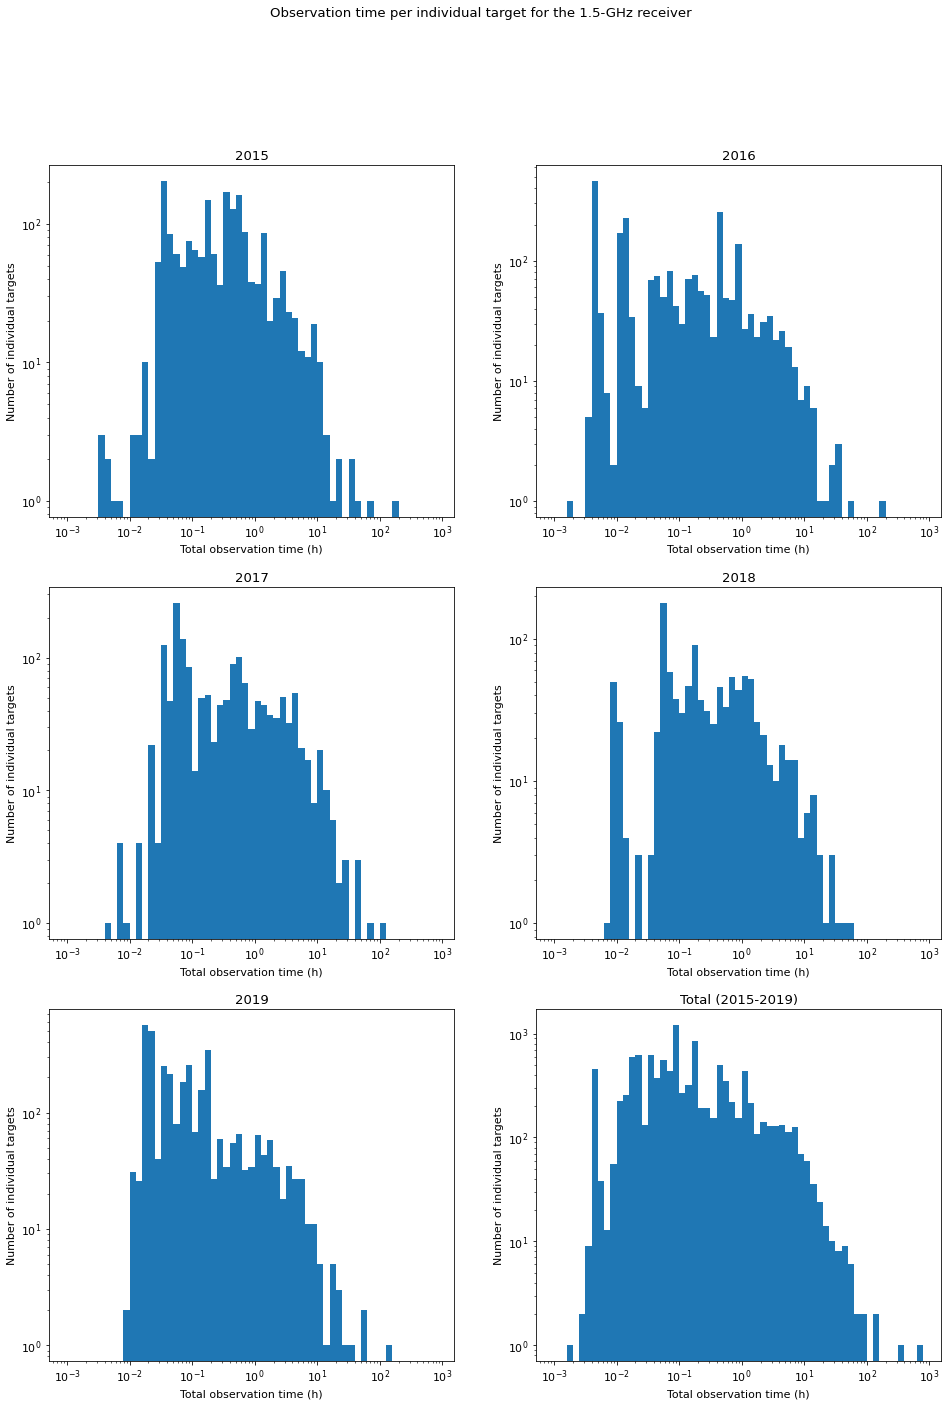

In [99]:
rcvr = '1.5GHz'

for i, y in enumerate(np.arange(2015, 2020)):

    plt.subplot(3, 2, i + 1)

    time_per_target = {}

    for obs in d[y]:
        if obs[2] == rcvr:
            if obs[3] not in time_per_target:
                time_per_target[obs[3]] = obs[1]/3600
            else:
                time_per_target[obs[3]] += obs[1]/3600

    bins = 10 ** (np.arange(-3, 3, 0.1))
    plt.hist(time_per_target.values(), log=True, bins=bins)
    plt.xscale('log')

    plt.xlabel('Total observation time (h)')
    plt.ylabel('Number of individual targets')
    plt.title(str(y))


plt.subplot(3, 2, 6)

time_per_target = {}
for y in d:
    for obs in d[y]:
        if obs[2] == rcvr:
            if obs[3] not in time_per_target:
                time_per_target[obs[3]] = obs[1]/3600
            else:
                time_per_target[obs[3]] += obs[1]/3600

bins = 10 ** (np.arange(-3, 3, 0.1))
plt.hist(time_per_target.values(), log=True, bins=bins)
plt.xscale('log')

plt.xlabel('Total observation time (h)')
plt.ylabel('Number of individual targets')
plt.title('Total (2015-2019)')

plt.suptitle('Observation time per individual target for the ' + rcvr[:-3] + '-' + rcvr[-3:] + ' receiver')
plt.gcf().set_size_inches(16, 22)
plt.rc('font', size=14)
plt.show()

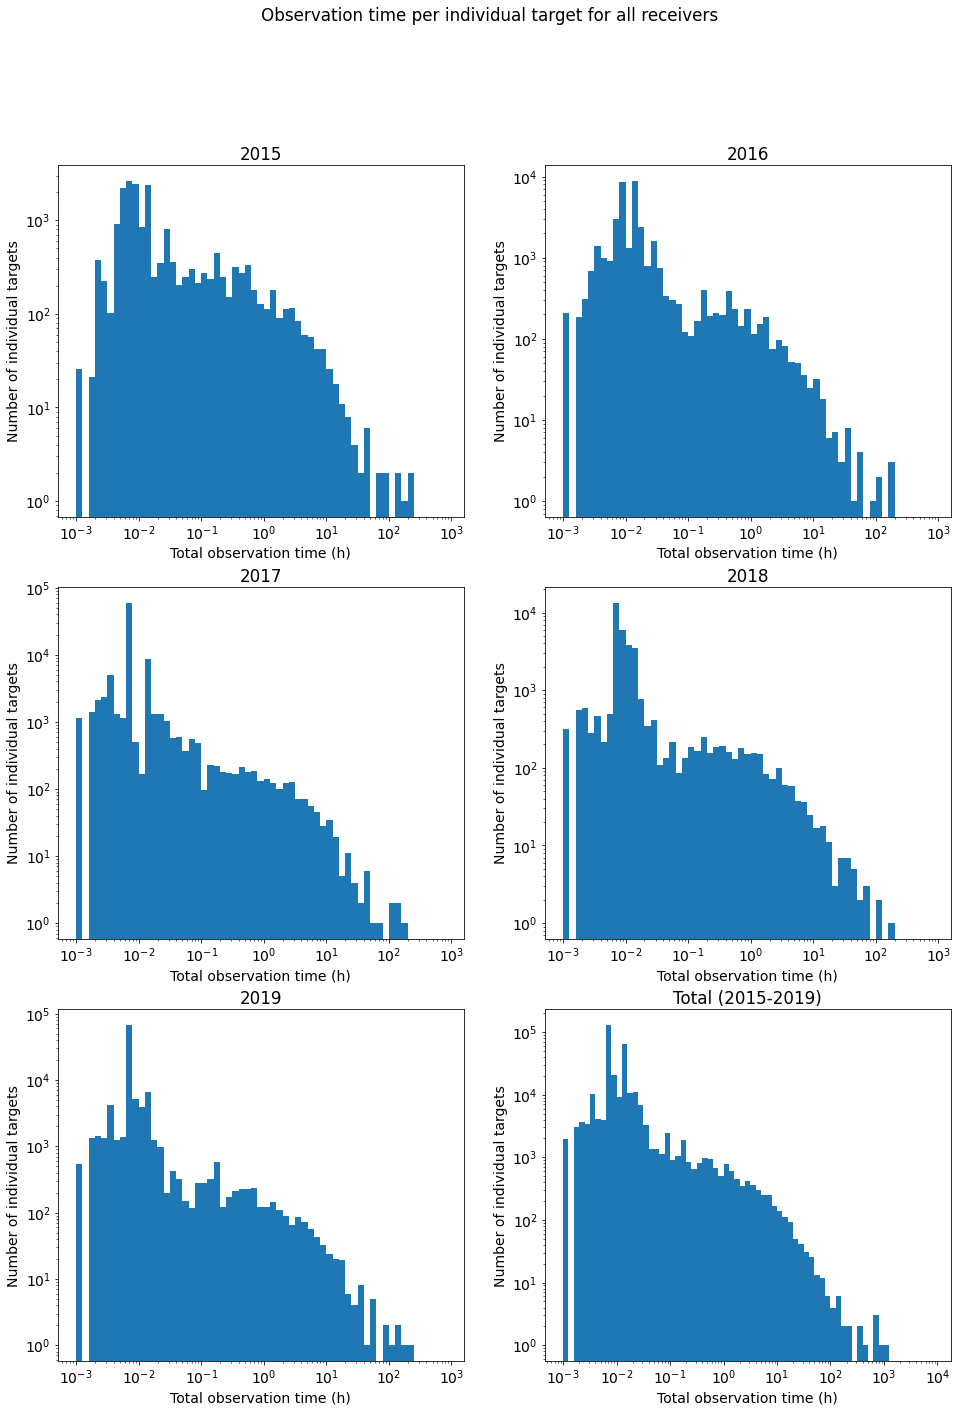

In [100]:
for i, y in enumerate(np.arange(2015, 2020)):

    plt.subplot(3, 2, i + 1)

    time_per_target = {}

    for obs in d[y]:
        if obs[3] not in time_per_target:
            time_per_target[obs[3]] = obs[1]/3600
        else:
            time_per_target[obs[3]] += obs[1]/3600

    bins = 10 ** (np.arange(-3, 3, 0.1))
    plt.hist(time_per_target.values(), log=True, bins=bins)
    plt.xscale('log')

    plt.xlabel('Total observation time (h)')
    plt.ylabel('Number of individual targets')
    plt.title(str(y))


plt.subplot(3, 2, 6)

time_per_target = {}
for y in d:
    for obs in d[y]:
        if obs[3] not in time_per_target:
            time_per_target[obs[3]] = obs[1]/3600
        else:
            time_per_target[obs[3]] += obs[1]/3600

bins = 10 ** (np.arange(-3, 4, 0.1))
plt.hist(time_per_target.values(), log=True, bins=bins)
plt.xscale('log')

plt.xlabel('Total observation time (h)')
plt.ylabel('Number of individual targets')
plt.title('Total (2015-2019)')

plt.suptitle('Observation time per individual target for all receivers')
plt.gcf().set_size_inches(16, 22)
plt.rc('font', size=12)
plt.show()

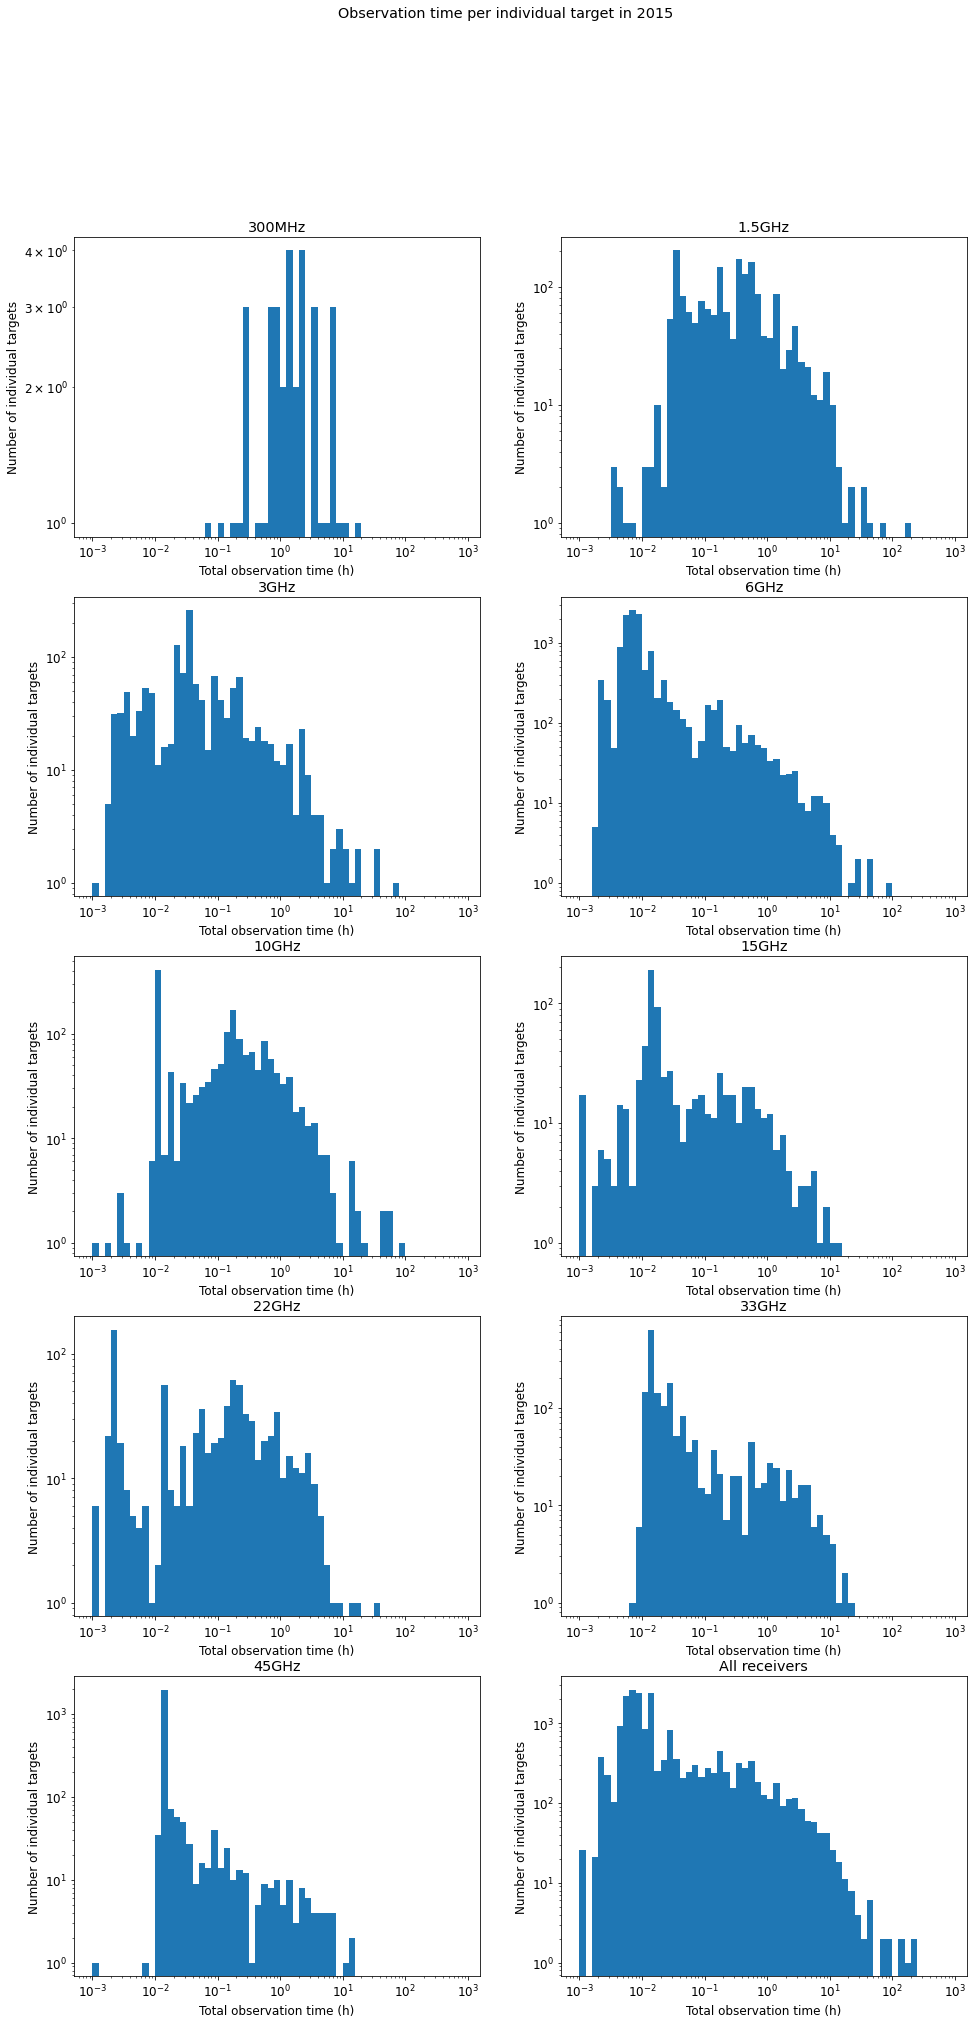

In [101]:
y = 2015

for i, rcvr in enumerate(receivers):

    plt.subplot(5, 2, i + 1)

    time_per_target = {}

    for obs in d[y]:
        if obs[2] == rcvr:
            if obs[3] not in time_per_target:
                time_per_target[obs[3]] = obs[1]/3600
            else:
                time_per_target[obs[3]] += obs[1]/3600

    bins = 10 ** (np.arange(-3, 3, 0.1))
    plt.hist(time_per_target.values(), log=True, bins=bins)
    plt.xscale('log')

    plt.xlabel('Total observation time (h)')
    plt.ylabel('Number of individual targets')
    plt.title(rcvr)


plt.subplot(5, 2, 10)

time_per_target = {}

for obs in d[y]:
    if obs[3] not in time_per_target:
        time_per_target[obs[3]] = obs[1]/3600
    else:
        time_per_target[obs[3]] += obs[1]/3600

bins = 10 ** (np.arange(-3, 3, 0.1))
plt.hist(time_per_target.values(), log=True, bins=bins)
plt.xscale('log')

plt.xlabel('Total observation time (h)')
plt.ylabel('Number of individual targets')
plt.title('All receivers')

plt.suptitle('Observation time per individual target in ' + str(y))
plt.gcf().set_size_inches(16, 32)
plt.rc('font', size=11)
plt.show()

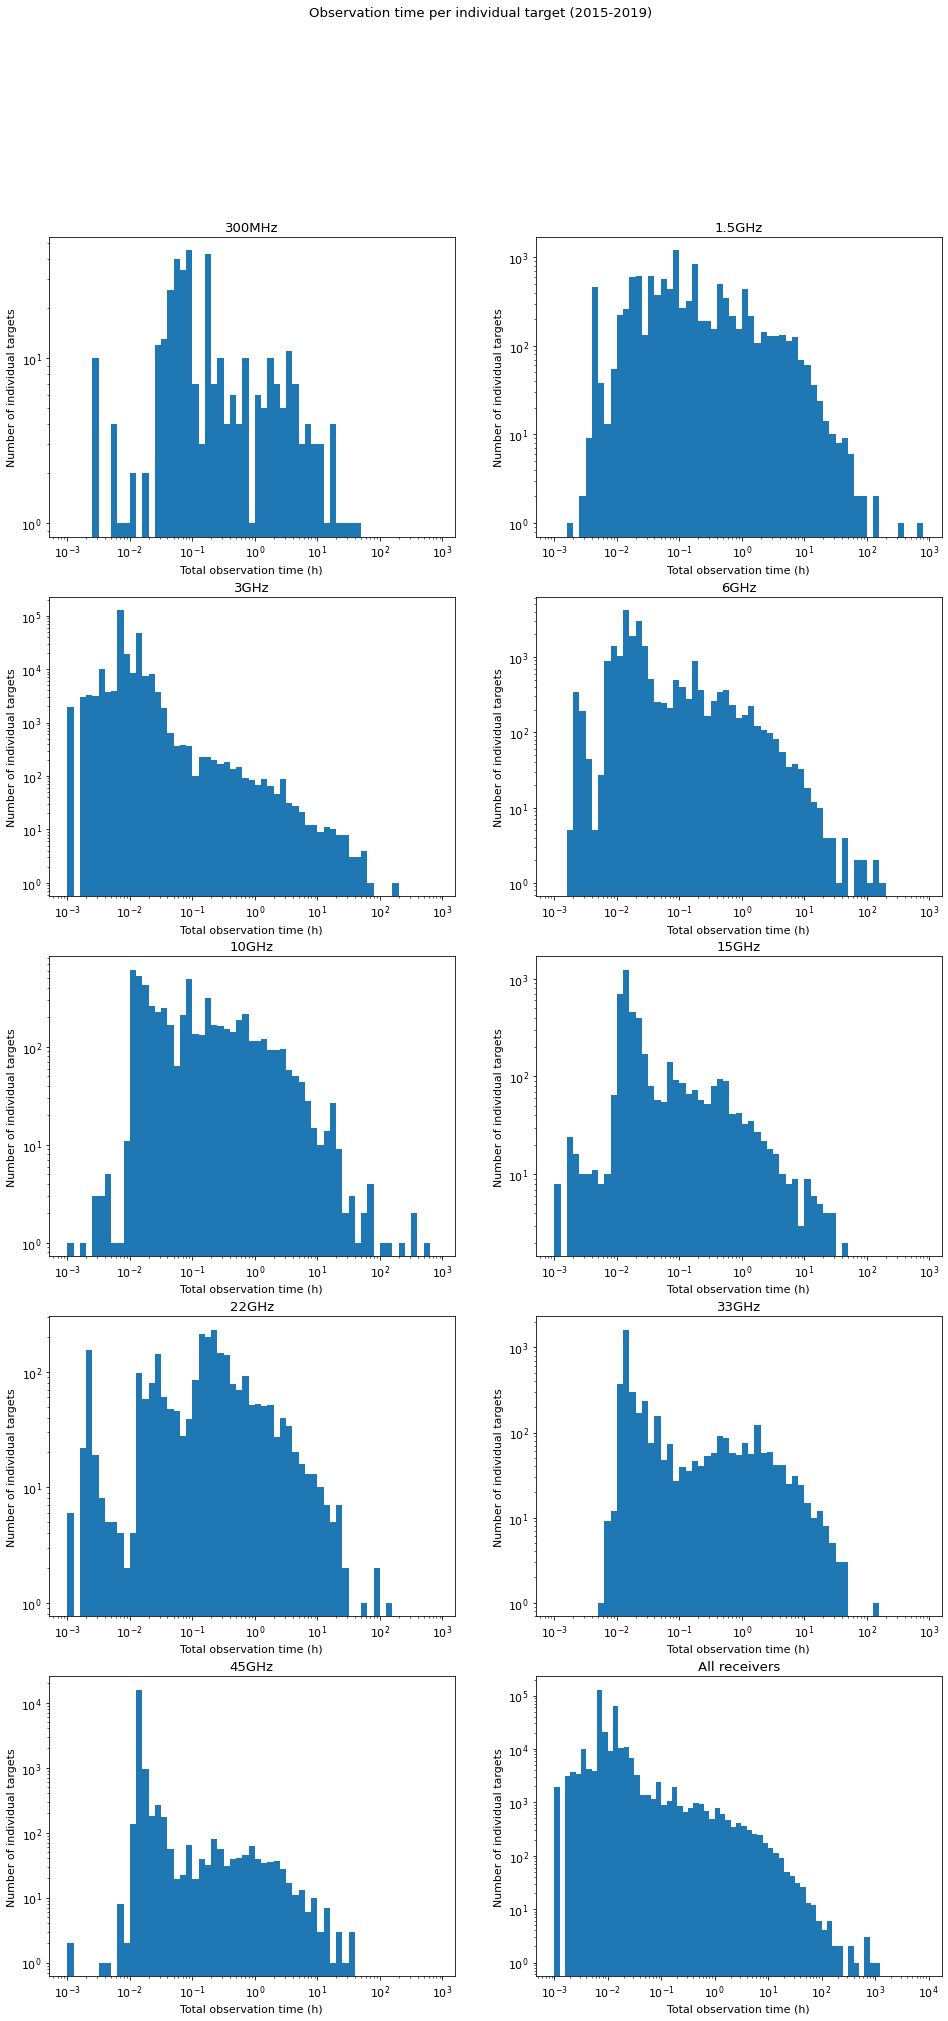

In [102]:
for i, rcvr in enumerate(receivers):

    plt.subplot(5, 2, i + 1)

    time_per_target = {}

    for y in d:
        for obs in d[y]:
            if obs[2] == rcvr:
                if obs[3] not in time_per_target:
                    time_per_target[obs[3]] = obs[1]/3600
                else:
                    time_per_target[obs[3]] += obs[1]/3600

    bins = 10 ** (np.arange(-3, 3, 0.1))
    plt.hist(time_per_target.values(), log=True, bins=bins)
    plt.xscale('log')

    plt.xlabel('Total observation time (h)')
    plt.ylabel('Number of individual targets')
    plt.title(rcvr)


plt.subplot(5, 2, 10)

time_per_target = {}

for y in d:
    for obs in d[y]:
        if obs[3] not in time_per_target:
            time_per_target[obs[3]] = obs[1]/3600
        else:
            time_per_target[obs[3]] += obs[1]/3600

bins = 10 ** (np.arange(-3, 4, 0.1))
plt.hist(time_per_target.values(), log=True, bins=bins)
plt.xscale('log')

plt.xlabel('Total observation time (h)')
plt.ylabel('Number of individual targets')
plt.title('All receivers')

plt.suptitle('Observation time per individual target (2015-2019)')
plt.gcf().set_size_inches(16, 32)
plt.rc('font', size=11)
plt.show()

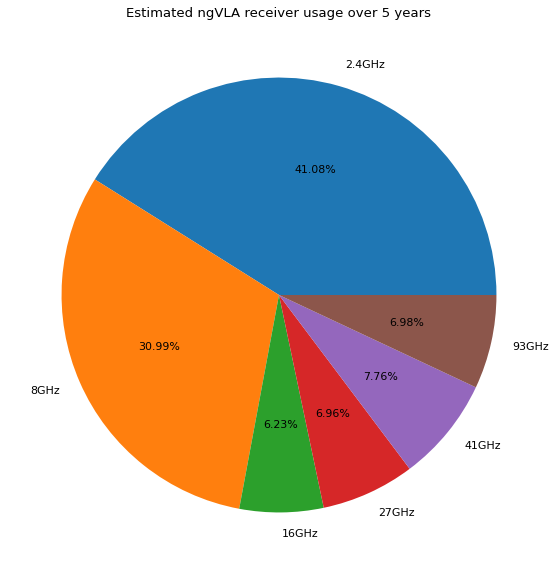

In [103]:
ngVLA_usage = [41.08, 30.99, 6.23, 6.96, 7.76, 6.98]
ngVLA_rcvrs = ['2.4GHz', '8GHz', '16GHz', '27GHz', '41GHz', '93GHz']

plt.pie(ngVLA_usage, labels=ngVLA_rcvrs, autopct='%1.2f%%')
plt.title('Estimated ngVLA receiver usage over 5 years')

plt.gcf().set_size_inches(10, 10)
plt.rc('font', size=12)
plt.show()

In [104]:
c = 3e8  # speed of light
diam = 18  # ngVLA diameter in meters

def beam_area(mid_freq, diam):
    """Return the area in deg^2 of sky covered by a beam observing at frequency mid_freq in Hz 
    with antenna diameter diam in m.
    
    """
    
    # Beam diameter is the full width at half maximum
    fwhm = (1.22 * c) / (mid_freq * diam)
    
    # Area from diameter
    area = np.pi * (fwhm / 2) ** 2
    
    return area * (u.rad ** 2).to(u.deg ** 2)

In [105]:
ngVLA_ranges = [[1200, 3500], [3500, 12300], [12300, 20500], [20500, 34000], [30500, 50500], [70000, 116000]]

In [106]:
ngVLA_sky_coverage = []

for i, rcvr_range in enumerate(ngVLA_ranges):
    mid_freq = np.mean(rcvr_range) * 1e6
    area = beam_area(mid_freq, diam)
    num = (len(all_targets) * ngVLA_usage[i]) // 100
    coverage = num * area
    ngVLA_sky_coverage.append(coverage)

In [107]:
ngVLA_sky_coverage

[20733.15250119847,
 1383.990928833395,
 64.55933287868221,
 26.124197250397962,
 13.185691255853653,
 2.2493098156545686]

In [108]:
len(all_targets)

261468